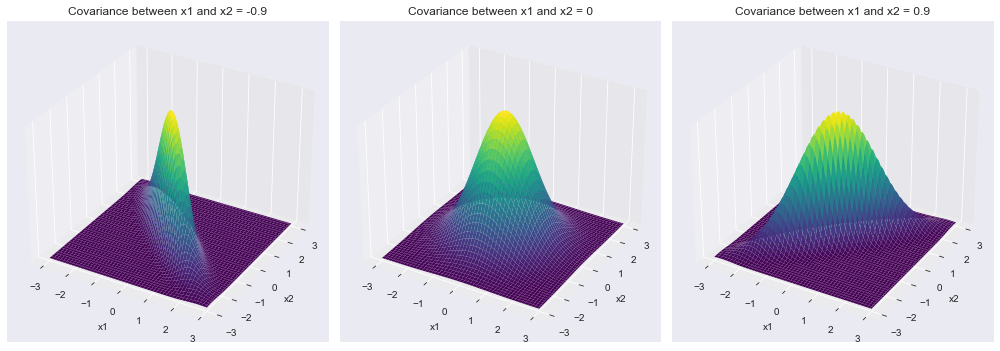

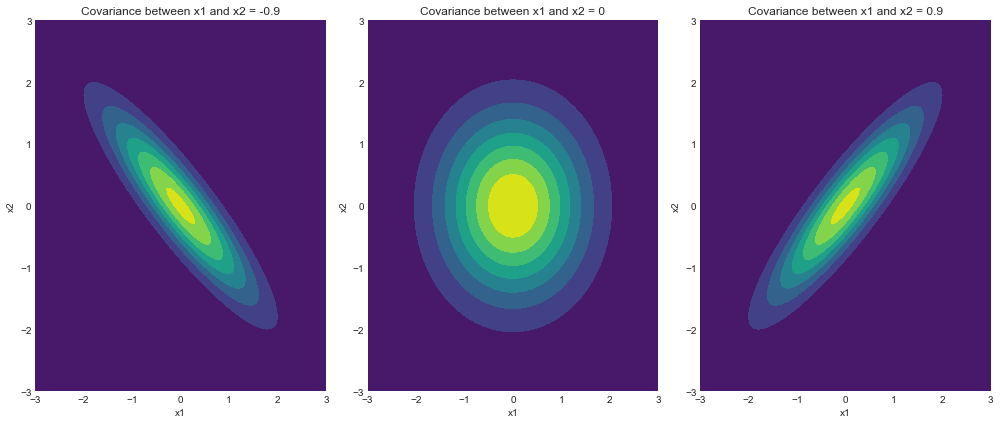

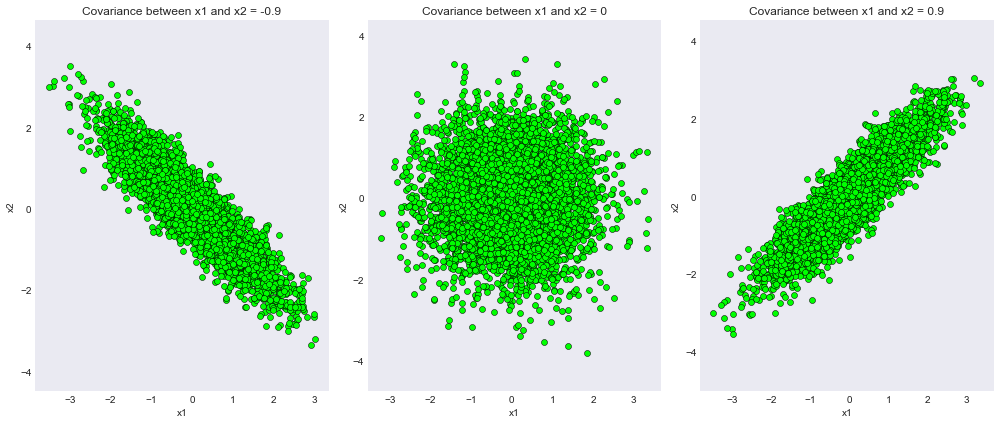

In [1]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.9, 0, 0.9]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
  
  # Initializing the covariance matrix
  cov = np.array([[1, val], [val, 1]])
  
  # Generating a Gaussian bivariate distribution
  # with given mean and covariance matrix
  distr = multivariate_normal(cov = cov, mean = mean,
                seed = random_seed)
  
  # Generating a meshgrid complacent with
  # the 3-sigma boundary
  mean_1, mean_2 = mean[0], mean[1]
  sigma_1, sigma_2 = cov[0,0], cov[1,1]
  
  x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
  y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
  X, Y = np.meshgrid(x,y)
  
  # Generating the density function
  # for each point in the meshgrid
  pdf = np.zeros(X.shape)
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
  
  # Plotting the density function values
  key = 131+idx
  ax = fig.add_subplot(key, projection = '3d')
  ax.plot_surface(X, Y, pdf, cmap = 'viridis')
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title(f'Covariance between x1 and x2 = {val}')
  pdf_list.append(pdf)
  ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
  plt.subplot(1,3,idx+1)
  plt.contourf(X, Y, val, cmap='viridis')
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
  plt.subplot(1,3,idx+1)
  
  # Initializing the covariance matrix
  cov = np.array([[1, val], [val, 1]])
  
  # Generating a Gaussian bivariate distribution
  # with given mean and covariance matrix
  distr = multivariate_normal(cov = cov, mean = mean,
                seed = random_seed)
  
  # Generating 5000 samples out of the
  # distribution
  data = distr.rvs(size = 5000)
  
  # Plotting the generated samples
  plt.plot(data[:,0],data[:,1], 'o', c='lime',
      markeredgewidth = 0.5,
      markeredgecolor = 'black')
  plt.title(f'Covariance between x1 and x2 = {val}')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.axis('equal')
plt.tight_layout()
plt.show()
